# What makes a good visualization?

files needed = ('nhe_cms.csv', 'map_data.zip')

Visualizations of data are probably the most important outputs data analysts will produce. We may spend a lot of time  building complex models and cleaning datasets, but when it comes to communicating our results, a visual display is often most efficient. Your results are only useful when they can be understood by others. 

In this notebook, we are taking a step back from  nitty-gritty (no, not [that one](https://www.thegritty.com/)) implementation details to spend some time thinking about what makes a "good" visualization. While the code to create the figures is in this notebook, we won't worry about every detail here. \[In particular, we'll cover geopandas and maps in much more detail later on.\] Instead, we'll focus on the figures.


Today we will cover: 

0. Why visualize? What is graphical excellence?
1. The big picture: Know your message, your audience, and your medium. 
2. Plot types: Match your plot type to your message.
3. Graphical concepts and best practices

### Why visualize?

Below, we load some data on U.S. national health expenditures. I have displayed the data from 2010 onward as a table. After looking at the table, answer these questions: 

Is the correlation between health expenditures (nhe) and GDP (gdp) positive or negative? Is the relationship linear?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
#plt.style.use('tableau-colorblind10')
import seaborn as sns

nhe = pd.read_csv('/Users/jackson/Documents/ECON570/data/nhe_cms.csv', index_col='year')
nhe.loc[nhe.index>=2010]

,nhe,consumption,personal,government,public_health,investment,population,gdp
year,,,,,,,,
2010,2589.6,2437.5,2180.5,181.4,75.7,152.1,309,15049.0
2011,2676.5,2517.8,2253.9,189.5,74.4,158.7,311,15599.7
2012,2783.3,2620.1,2346.2,196.7,77.2,163.2,314,16254.0
2013,2856.6,2693.5,2405.2,206.9,81.5,163.1,316,16843.2
2014,3002.6,2843.1,2527.1,231.6,84.4,159.6,318,17550.7
2015,3165.4,3002.3,2674.3,242.5,85.5,163.1,320,18206.0
2016,3307.4,3141.2,2795.6,255.7,90.0,166.2,323,18695.1
2017,3446.5,3265.9,2903.8,266.6,95.5,180.6,325,19477.3
2018,3604.4,3414.6,3019.8,295.4,99.4,189.9,327,20533.1


If you are anything like me, you probably have no idea how to answer these questions by looking at a table of numbers. 

Now take a look at this figure.

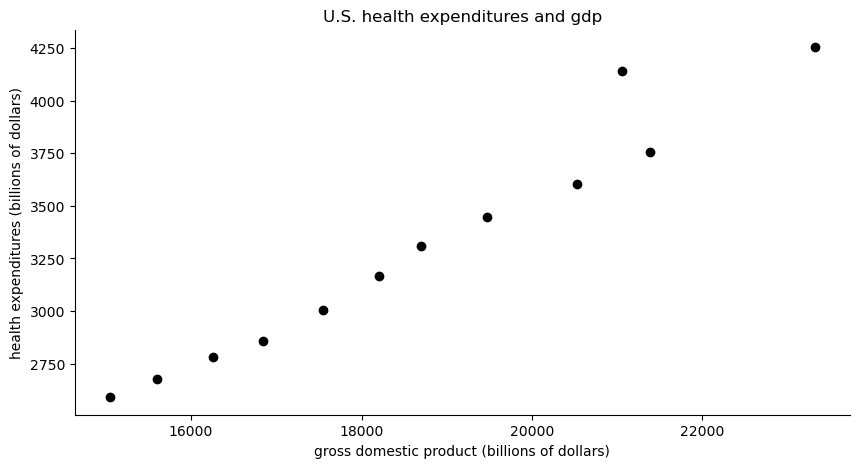

In [3]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax.scatter(nhe.loc[nhe.index>=2010,'gdp'], nhe.loc[nhe.index>=2010,'nhe'],          # line plot of gdp vs. time
        color='black'                   # set the line color to black
       )  

ax.set_ylabel('health expenditures (billions of dollars)')
ax.set_xlabel('gross domestic product (billions of dollars)')
ax.set_title('U.S. health expenditures and gdp')
sns.despine(ax=ax)

plt.show()

* Is the correlation between health expenditures (nhe) and GDP (gdp) positive or negative? **Positive!**

* Is the relationship linear? **Pretty much!**

All the information that is in this figure is in the table of numbers from above.

**Key idea: Visualizations are powerful ways to summarize large amounts of data.**

## Graphical excellence

You will sometime catch me saying: "That is a pretty figure." I do not mean that the figure is pretty in an artistic sense, but rather that the figure is graphically excellent.

[Edward Tufte's](https://www.edwardtufte.com/tufte/books_vdqi) *The Visual Display of Quantitative Information* is a masterpiece of "thinking hard about visualizations." The book is worth a read (or a look through). His Principles of Graphic Excellence are great to keep in mind. Two of my favorites:

* Graphical excellence consists of complex ideas communicated with clarity, precision, and efficiency.
* Graphical excellence is that which gives the viewer the greatest number of ideas, in the shortest time, with the least ink, in the smallest space. 

Let us all strive for graphical excellence.

What follows is a distillation of ideas from several sources as well as my own thoughts. I encourage you to look through these sources, too. 

* *Ten Simple Rules for Better Figures* ([Rougier, Droettboom, and Bourne, 2014](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833#s10)). The *big picture* discussion below is based on some of their rules. My favorites: **"Do not trust the defaults"** and **"Message trumps beauty"**.


* Tufte's [*The Visual Display of Quantitative Information*](https://www.edwardtufte.com/tufte/books_vdqi).


* Cole Nussbaumer Knaflic's [*Storytelling with Data*](http://www.storytellingwithdata.com/). 


* [*Data Visualization: Rules and Guidelines*](https://datascience.quantecon.org/tools/visualization_rules.html) from the QuantEcon group. This entire website is good. 

## The big picture

We spend a lot of time on the details of our visualizations: data wrangling, formatting axes, choosing colors, labeling...

Before working out the details of a visualization, we need to take a step back and get a handle on the big picture: 

1. Your message
2. Your audience
3. Your medium


### 1. Know your message

This is the most important part of any visualization. All of the decisions you make regarding the details of the figure will be made in support of your message. What message are you trying to convey? Some examples: 


* I want to show how a variable changed over time.
* I want to compare a variable in two geographic locations. 
* I want to show how two variables are related to each other.
* I want to show that something is big or small. 

As a general rule, each visualization should have **one message**. When you are deciding to include a figure in a project ask yourself: "What do I want the reader to learn from this?"   

### 2. Know your audience

Are you writing for an academic audience with a lot of background knowledge about the subject? Are you writing for someone who knows a bit about statistics but nothing about your subject? Are you writing for the average reader of the *Wall Street Journal*? For anyone who might come across it on social media?

Defining your target audience will help keep your visualization appropriate. If you are writing for a general audience, it might not be useful to include the variance and autocorrelation of a variable. If you are writing for a math-literate audience, you probably do not need to explain what a log axis means. Your audience will be one factor in determining which details to include and which to leave out. 

### 3. Know your medium

Where do you intend to publish your visualization? On paper? On the web? In a magazine? 

This is particularly important to keep in mind when you are thinking about color in a figure and whether to include fine details.

When I am writing a research paper, I expect it to be printed out on paper for someone to read. This often happens in black-and-white, so I make sure my figures can be understood without color. Figures in a paper are usually only a few square inches, so I try to avoid small details that would be hard to read without magnification. 


When I make figures for a seminar presentation that will be projected onto a screen, I use color when it is useful. The large format of the figure also means that I can include more details, but those details have to be useful in supporting my message. Otherwise, I leave them out! 


In many cases, I make two versions of the same figure: one for the paper and another for the presentation. 


## Plot types

Our message will largely drive the type of visualization we will use. There are many to choose from: The [Data Visualization Catalog](https://datavizcatalogue.com/index.html) provides an extensive list of plot types. 

In general, I use only a handful of plot types, and if you read the *New York Times*, *The Wall Street Journal*, *The Economist*, etc., you will notice the popularity of just a few types of visualizations: 

1. Line plots
2. Scatter plots
3. Bar plots
4. Histograms
5. Maps

We briefly review these below. We begin with data on U.S. national health expenditures.

### 1. Line plots

Line plots are good for showing *trends*, such as the evolution of a variable over many time periods. Often, time is on the x axis and the variable of interest in on the y axis. Although we only have data for each year, we connect the points with a line, which means we are linearly interpolating the trend between each pair of adjacent points. 

If we only have data for a few points in time, we might be better off with a bar chart (see below).

Below, we plot U.S. NHE from 1960 to 2021. Time is on the x axis and NHE is on the y axis. 

**The message:** NHE has grown a lot since 1960. The shape of the curve suggests that the growth is exponential. 

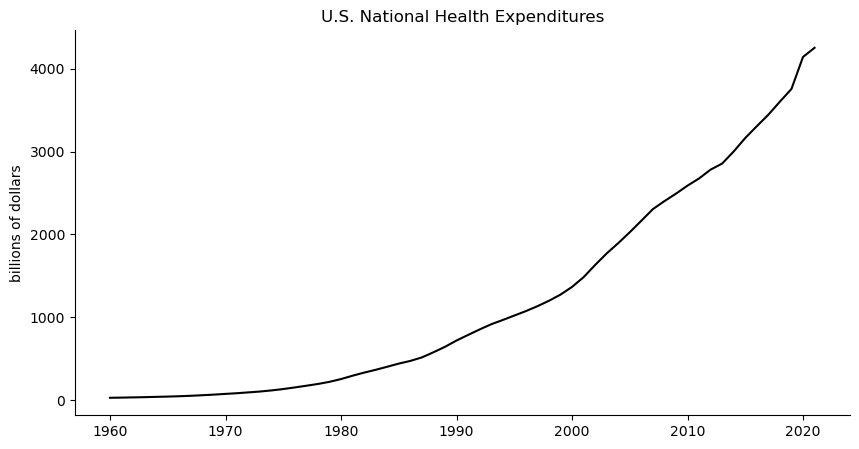

In [4]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(nhe.index, nhe['nhe'],          # line plot of gdp vs. time
        color='black'                   # set the line color to black
       )  

ax.set_ylabel('billions of dollars')
ax.set_title('U.S. National Health Expenditures')

sns.despine(ax=ax)

plt.show()

Variants: Add markers, labels, or a legend. Use a log axis to make the exponential nature of growth more apparent. 

### 2. Scatter plots

Scatter plots are good for showing the relationship <mark>between two numeric variables</mark>. Each point corresponds to an (x,y) pair. Below, we plot aggregate investment spending (y-axis) and gdp (x-axis). 

**The message:** NHE is positively correlated with GDP. The relationship is roughly linear. 

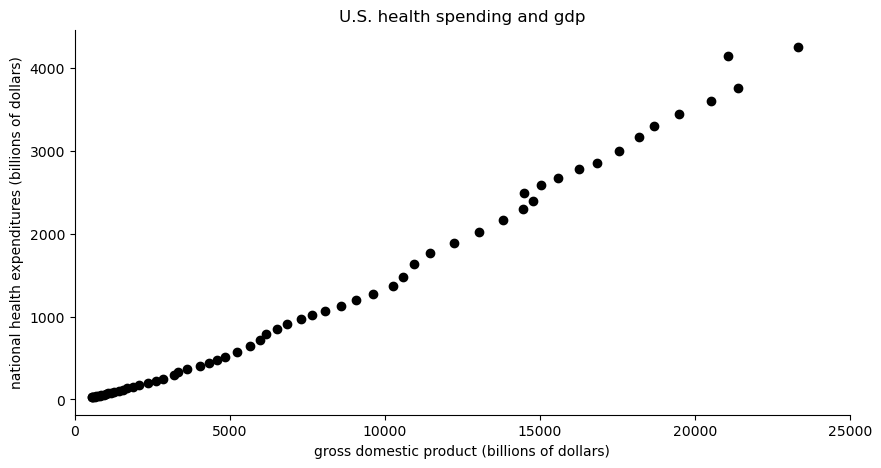

In [5]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax.scatter(nhe['gdp'], nhe['nhe'],          
        color='black'                   # set the marker color to black
       ) 

ax.set_ylabel('national health expenditures (billions of dollars)')
ax.set_xlabel('gross domestic product (billions of dollars)')
ax.set_title('U.S. health spending and gdp')
ax.set_xlim(0, 25000)
sns.despine(ax=ax)

plt.show()

Variants: Add a regression line. Scale the points against a third variable.

Below we add the regression line using the seaborn package. Now the message "the relationship is linear" is even more apparent. 

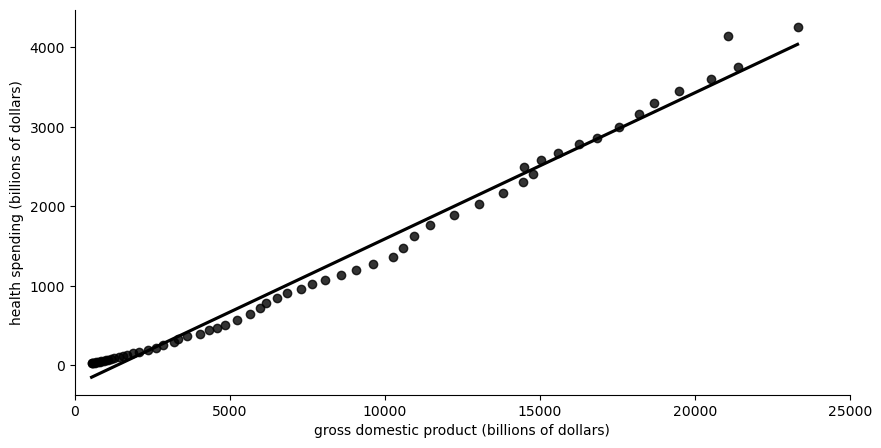

In [6]:
my_fig, my_ax = plt.subplots(figsize=(10,5))

sns.regplot(x='gdp', y='nhe', data=nhe, ax = my_ax, color = 'black', ci = 0) 

sns.despine(ax=my_ax)
my_ax.set(xlabel='gross domestic product (billions of dollars)', ylabel='health spending (billions of dollars)')
ax.set_title('U.S. health spending and gdp')
my_ax.set_xlim(0, 25000)
plt.show()

### 3. Bar plots

Bar plots are good for comparing the values of relatively few, discrete observations. Bar or stacked bar plots are almost always preferred to a pie chart. \[I cannot think of a case in which I would rather use a pie chart, but I'm leaving myself some wiggle room.\] 

Below we plot the average NHE growth rate over decade intervals. We only have six data points. 

**The message:** NHE growth peaked in the 70s, and has drifted lower since. 

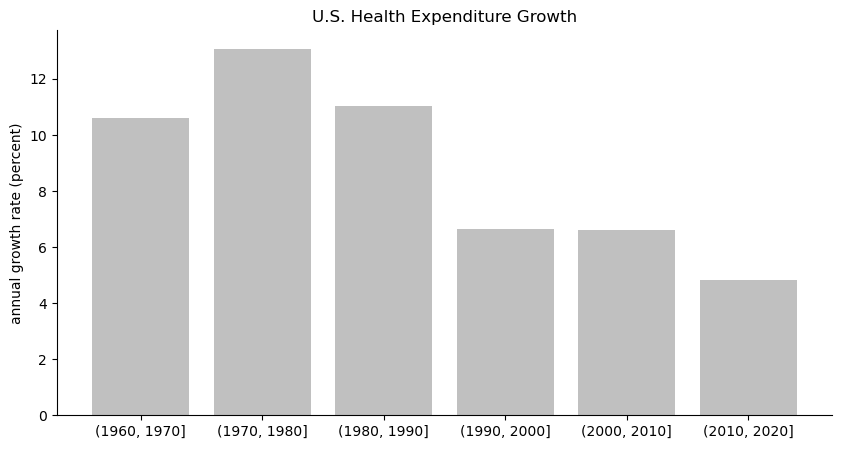

In [7]:
# Compute the NHE growth rate. 
nhe['nhe_gr'] = nhe['nhe'].pct_change()*100
# Create 10-year bins.
nhe['long_period']=pd.cut(nhe.index, bins=range(1960,2021,10))
# Take average over these 10-year bins.
nhe_long = nhe.groupby('long_period',observed=True).mean()

fig, ax = plt.subplots(figsize=(10,5)) 

ax.bar(nhe_long.index.astype(str), nhe_long['nhe_gr'], color='silver')
ax.set_ylabel('annual growth rate (percent)')
ax.set_title('U.S. Health Expenditure Growth')
sns.despine(ax=ax)

Variants: stacked bar plots, grouped bar plots, horizontal bar plots.

### 4. Histograms

Histograms are good for visualizing the distribution of a variable. In what range are the values concentrated? What are the minimum and maximum values? Histograms are typically displayed as bars. Each bar represents an interval of the values (often called *bins*) a variable can take and the height of the bar reports how often the data are in this interval. The x axis measures the values of the variable and the y axis measures the frequency of the value. 

Below, we plot the histogram of U.S. NHE growth rates. 

**The message:** NHE growth is typically in the range of five to thirteen percent, and has always been positive. 

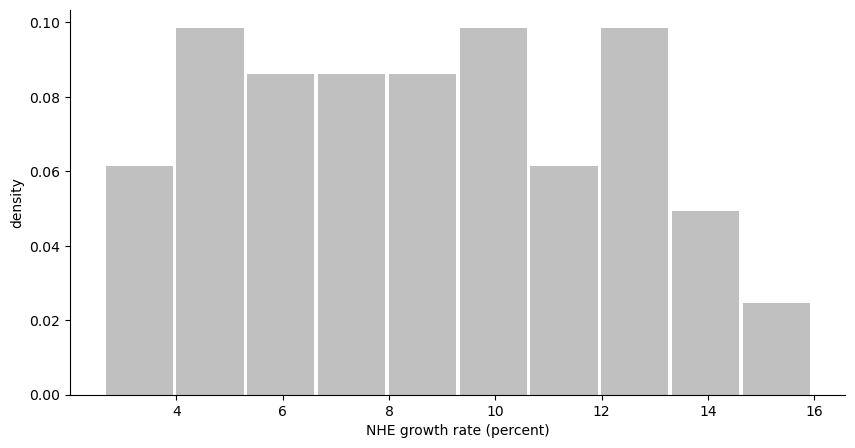

In [8]:
fig, ax = plt.subplots(figsize=(10,5)) 

ax.hist(nhe['nhe_gr'], color='silver', density=True, rwidth=0.95)

# Advantages / disadvantages of kernel density plot?
#sns.kdeplot(nhe['nhe_gr'])

#ax.set_ylim(0, 0.10)
sns.despine(ax=ax)
ax.set_xlabel('NHE growth rate (percent)')
ax.set_ylabel('density')
plt.show()

Variants: Kernel density plots, which estimate a continuous pdf from the data. Adding a line to represent the mean of the data.

### 5. Maps

Maps are useful for displaying the spatial dimension of data. How is a variable distributed geographically? Is it concentrated in one part of the country? (E.g., housing is most expensive on the coasts; corn is mostly grown in the midwest.) Is a variable correlated with geographic features? (E.g., truck stops are located near highways; bars are located near universities.)

Below, we plot the cumulative number of Covid-19 cases per capita, by county, in Wisconsin. Is there a spatial relationship in the spread of the virus?

**The message:** There are three clusters of cases. One around Menominee County, one around Jackson County, and one around Dodge County. 

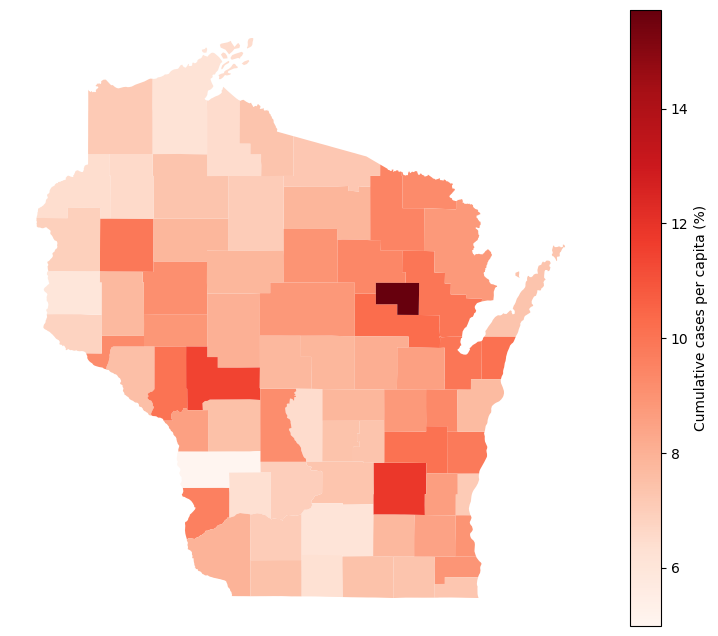

In [9]:
import geopandas as gpd
import fiona
map_data = gpd.read_file('/Users/jackson/Documents/ECON570/data/map_data.zip')

fig, ax = plt.subplots(figsize=(10,8))

lkwds={'label': 'Cumulative cases per capita (%)'}

map_data.plot(ax = ax, column='PCT_INF', cmap='Reds', legend=True, legend_kwds = lkwds)
plt.axis('off')

plt.show()

## Practice

Use markdown cells to write out your answers to the practice problems. 

### 1. Match the message to the plot type
For each of the messages below, choose the appropriate plot type. Describe what variable would be on each axis, if applicable.

You have daily data on the temperature in Madison, WI and the number of bikes that crossed [the bike counter at Regent St and Monroe St](https://www.cityofmadison.com/bikemadison/planning/visualbikecounter.cfm). 

1. I want to show that the temperature is coldest in January and February. 
    - Bar Plot
2. I want to show that fewer people ride bikes when the weather is cold. 
    - Histogram

You have data on the locations for Walmart distribution centers and Walmart stores. You also have data on the population density of the counties in which Walmart stores are located.

3. I want to show that Walmart stores cluster around Walmart distribution centers. 
    - Choropleth
4. I want to show that Walmart stores are located in "medium" density locations and not in extremely dense cities like New York.
    - Bar Chart, Density pop/Walmart Stores


### 2. Know your medium

Visualizations meant for online distribution are often interactive. Hovering over parts of the figure pop up additional information. [Here](https://www.kff.org/coronavirus-covid-19/issue-brief/global-covid-19-tracker/) is an example with Covid data.

1. What are the benefits of creating an interactive visualization?
    - Attention spans will lengthen when people can view individual observations
2. What are the potential problems with an interactive visualization? 
    - May add to confusion for some, and have misleading data at times.

## Graphical concepts: Best practices

There are hundreds of details, rules, and best practices regarding visualization, but, as in most things, a few simple things make a big difference.  

1. Clutter: spines and boxes
2. Legends and labels
3. Color
4. Axes formats

### 1. Clutter

Remember Tufte's principle of "the least ink." Every mark in a figure should be doing something. If it is not, it is clutter and should be eliminated. This is the **golden rule** of visualization.

Boxes around figures (which are made up of four "spines") are inexplicably the default behavior of many plotting packages, including matplotlib. Compare the images below. 

Do the top and right spines help you better understand the GDP figure? They do not, so I remove them. You can turn off spines individually:
```python
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
```
or use the seaborn package 
```python
import seaborn as sns
sns.despine(ax=ax)
```


In the map example, it's even worse. Do you need to know the coordinate values in the map? Is our goal to navigate to [Woodruff, WI](https://www.roadsideamerica.com/story/2255)? It is more efficient to just turn the axes off. 

```python
plt.axis('off');
```


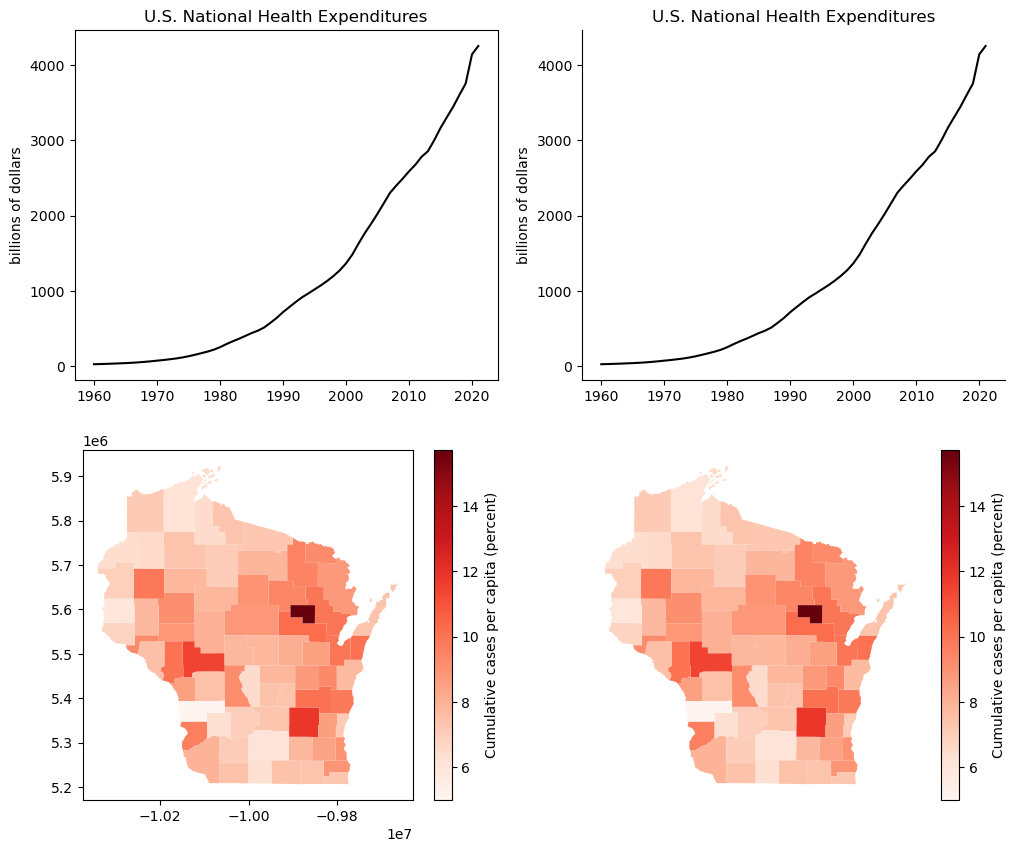

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12,10)) 

for a in range(0,2):
    ax[0][a].plot(nhe.index, nhe['nhe'], color='black')  
    ax[0][a].set_ylabel('billions of dollars')
    ax[0][a].set_title('U.S. National Health Expenditures')

    sns.despine(ax=ax[0][1])

lkwds={'label': 'Cumulative cases per capita (percent)'}
map_data.plot(ax = ax[1][1], column='PCT_INF', cmap='Reds', legend=True, legend_kwds = lkwds)
map_data.plot(ax = ax[1][0], column='PCT_INF', cmap='Reds', legend=True, legend_kwds = lkwds)  
plt.axis('off')      
    
plt.show()

### 2. Legends and labels

In the figures below, I have added GDP to our NHE figure. How do we tell the two apart? One way is to use a legend. Notice that the default legend has a box around it. More clutter. We turn the box off with 

```python
ax.legend(frameon=False)
```

An alternative approach is to add labels directly to the figure. This approach has two big advantages. First, the reader does not need to look back-and-forth between the legend and the lines to keep track of which line is which. Second, I do not need to rely on color or different line styles to differentiate the lines. 

```python
ax[1].text(2000, 15500, 'gdp')
ax[1].text(2000, 2500, 'nhe')
```

This approach is not always applicable. If the lines are very close to each other, if there are many lines, or if the lines overlap, then it may be preferable to use a legend. 

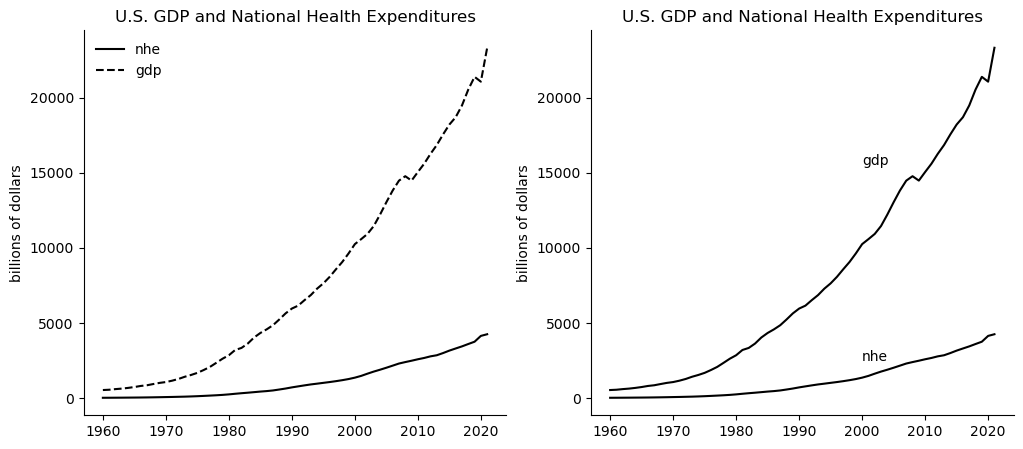

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,5)) 

for a in range(0,2):
    ax[a].plot(nhe.index, nhe['nhe'], color='black', label='nhe')  
    ax[a].set_ylabel('billions of dollars')
    ax[a].set_title('U.S. GDP and National Health Expenditures')
    sns.despine(ax=ax[a])
    
ax[0].plot(nhe.index, nhe['gdp'], color='black', ls='--', label='gdp')  
ax[0].legend(frameon=False)

ax[1].plot(nhe.index, nhe['gdp'], color='black', ls='-', label='gdp')  
ax[1].text(2000, 15500, 'gdp')
ax[1].text(2000, 2500, 'nhe')

plt.show()

### 3. Color

More than once I have asked someone why they used a color in their plot and they replied "because it looks good." We are not making art here! We should be using color to make our figures more informative. The links at the top of this notebook contain more on color choice and [representing color in computer graphics](https://en.wikipedia.org/wiki/HSL_and_HSV) is fascinating in its own right. I want to just cover a few basics here. 

I mostly use color to 

1. Differentiate variables in a figure with many variables
2. Indicate the value of a variable in a choropleth map 

I never use color

1. In the background. Some people will use a very light gray as background in the plot. ggplot, seaborn, and NBER include gray/blue backgrounds in their default style. If you think a gray background makes it easier to interpret your plot, then go for it.   

### Differentiating variables
In the figure below, I add more variables of the U.S. national health expenditures: "personal"  health care expenditures; "government" administration (government and insurer administrative costs); and government "public health" activity. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


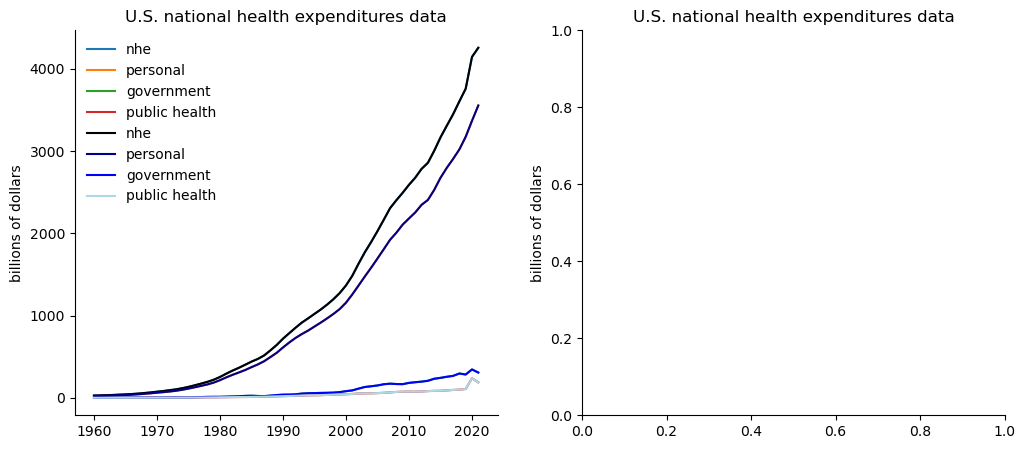

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,5)) 

ax[0].plot(nhe.index, nhe['nhe'], label='nhe')  
ax[0].plot(nhe.index, nhe['personal'], label='personal')  
ax[0].plot(nhe.index, nhe['government'], label='government') 
ax[0].plot(nhe.index, nhe['public_health'], label='public health')  

ax[0].plot(nhe.index, nhe['nhe'], color='black', label='nhe')  
ax[0].plot(nhe.index, nhe['personal'], color='darkblue', label='personal')  
ax[0].plot(nhe.index, nhe['government'], color='blue', label='government') 
ax[0].plot(nhe.index, nhe['public_health'], color='lightblue', label='public health')  

# ax[1].plot(nhe.index, nhe['nhe'], color='black', label='nhe')  
# ax[1].plot(nhe.index, nhe['personal'], color='black', ls='--', label='personal')  
# ax[1].plot(nhe.index, nhe['government'], color='black', ls='-.', label='government') 
# ax[1].plot(nhe.index, nhe['public_health'], color='black', ls=':', label='public health') 

for a in range(0,2):
    ax[a].set_ylabel('billions of dollars')
    ax[a].set_title('U.S. national health expenditures data')
    ax[a].legend(frameon=False)
    sns.despine(ax=ax[a])

plt.savefig('color.jpg')
plt.show()

The color makes it easier to tell the lines apart, especially in the early periods, when the lines are close together and some overlap. The figure on the right takes more work to sort out which line pattern corresponds to which variable. 

**Warning:** The figure on the left will be difficult to read when printed in black and white. Moreover, if you let `matplotlib` choose colors for you, the plot may be difficult to read for people with colorblindness. See [the documentation](https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html) for discussion. Red-green colorblindness is relatively common, so color schemes that include both should be avoided. You can choose your color scheme directly using [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html), or you could address the defaults using style sheets as shown above.

### Mapping colors

The second place I tend to use color in visualizations is to plot a variable in "color space." The choropleth map of Covid cases from above is a good example ([heatmaps](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) are another). They key here is the choice of colormap. A *colormap* is a sequence of colors that are mapped to the values of a variable. In the Covid map case, the colormap uses different intensities of the color red to indicate the value of the Covid infection rate. The higher the value in the data, the darker the color red.  

There are different types of colormaps that are good for different kinds of data. From the excellent [colormap tutorial](https://matplotlib.org/stable/tutorials/colors/colormaps.html) at matplotlib: 

>Sequential: change in lightness and often saturation of color incrementally, often using a single hue; should be used for representing information that has ordering.


>Diverging: change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color; should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.


>Cyclic: change in lightness of two different colors that meet in the middle and beginning/end at an unsaturated color; should be used for values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.

>Qualitative: often are miscellaneous colors; should be used to represent information which does not have ordering or relationships.



Below, I have plotted the covid map using examples of the four types of colormaps. 

* The **sequential** map clearly works best here, as the data (the infection rate) has a natural, monotone order. 

* The **diverging** map is still useful. We just need to keep in mind that dark red is a high value and dark blue is a low value. The issue here, though, is that there is nothing interesting about the point in which we switch from blue to red (somewhere around 11 percent). Using the two-color scheme is not adding any new information. 

* The **cyclic** map is not very useful. The reader now has to keep track of light blues, purples, dark reds,...this is way too hard to interpret. 

* The **qualitative** map is useless in this context. There is no intuitive order to the colors and the discrete color blocks remove information from the visualization.

*Question: Which of these plots are colorblind-friendly?*

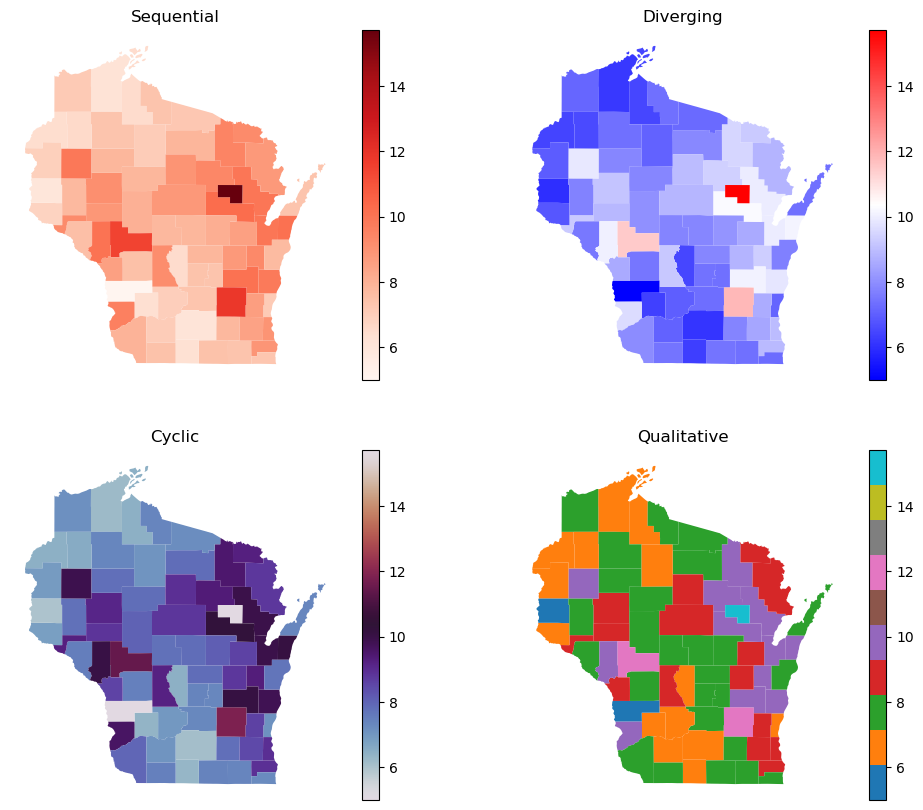

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12,10)) 

lkwds={'label': 'Cumulative cases per capita (percent)'}

for a, cm, t in zip(ax.reshape(-1), ['Reds', 'bwr', 'twilight', 'tab10'], ['Sequential', 'Diverging', 'Cyclic', 'Qualitative']):
    map_data.plot(ax = a, column='PCT_INF', cmap=cm, legend=True)
    a.set_title(t)
    a.axis('off')
    
plt.show()

### 4. Axes

Axes (when applicable) are extremely important parts of visualizations and should be given with the same level of care as the rest of the figure. 

**Labels** <br>

* **Always** label your axes! The only exception I make is when it is glaringly obvious, such as when one axis is obviously the date. 
* Include the units your axes are measured in: percent, billions of dollars, dollars per unit, ...

**Ticks**<br>
The plotting package you use will add ticks and labels. Often, they are reasonable, but **do not trust the default.** Check the ticks and labels and make sure they are excellent. 

* Do not use too many ticks and labels. 
* Use easy-to-interpret tick intervals. E.g., spaced apart by 100, rather than 106
* If you need to control the limits of the axes use
```python
ax.set_xlim(minval, maxval)
ax.set_ylim(minval, maxval)
```
* Set custom ticks by passing an array or list of tick values. `np.arrange()` is like the `range()` method but takes floats instead of ints.  
```python
tick_vals = np.arange(start, end, stepsize)
ax.xaxis.set_ticks(tick_vals)
```
* Format the tick labels using string format codes
```python
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
```
* Rotate tick labels if they overlap (`ax.tick_params` can do [lots of things](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html))
```python
ax.tick_params(axis='x', labelrotation=45)
```

Below, I plot the cumulative Covid infection rate by county for 12/31/2020. To clean up the x axis, I remove the extra space using `set_xlim()` and I rotate the tick labels. By setting the tick length to zero, I remove the tick. It is not conveying any useful information.
```python
ax[1].set_xlim(-1, 72)
ax[1].tick_params(axis='x', labelrotation=90, length=0)
```
My next step would be to sort the bars in ascending order so it is easy to see which counties have had the most infections per capita.

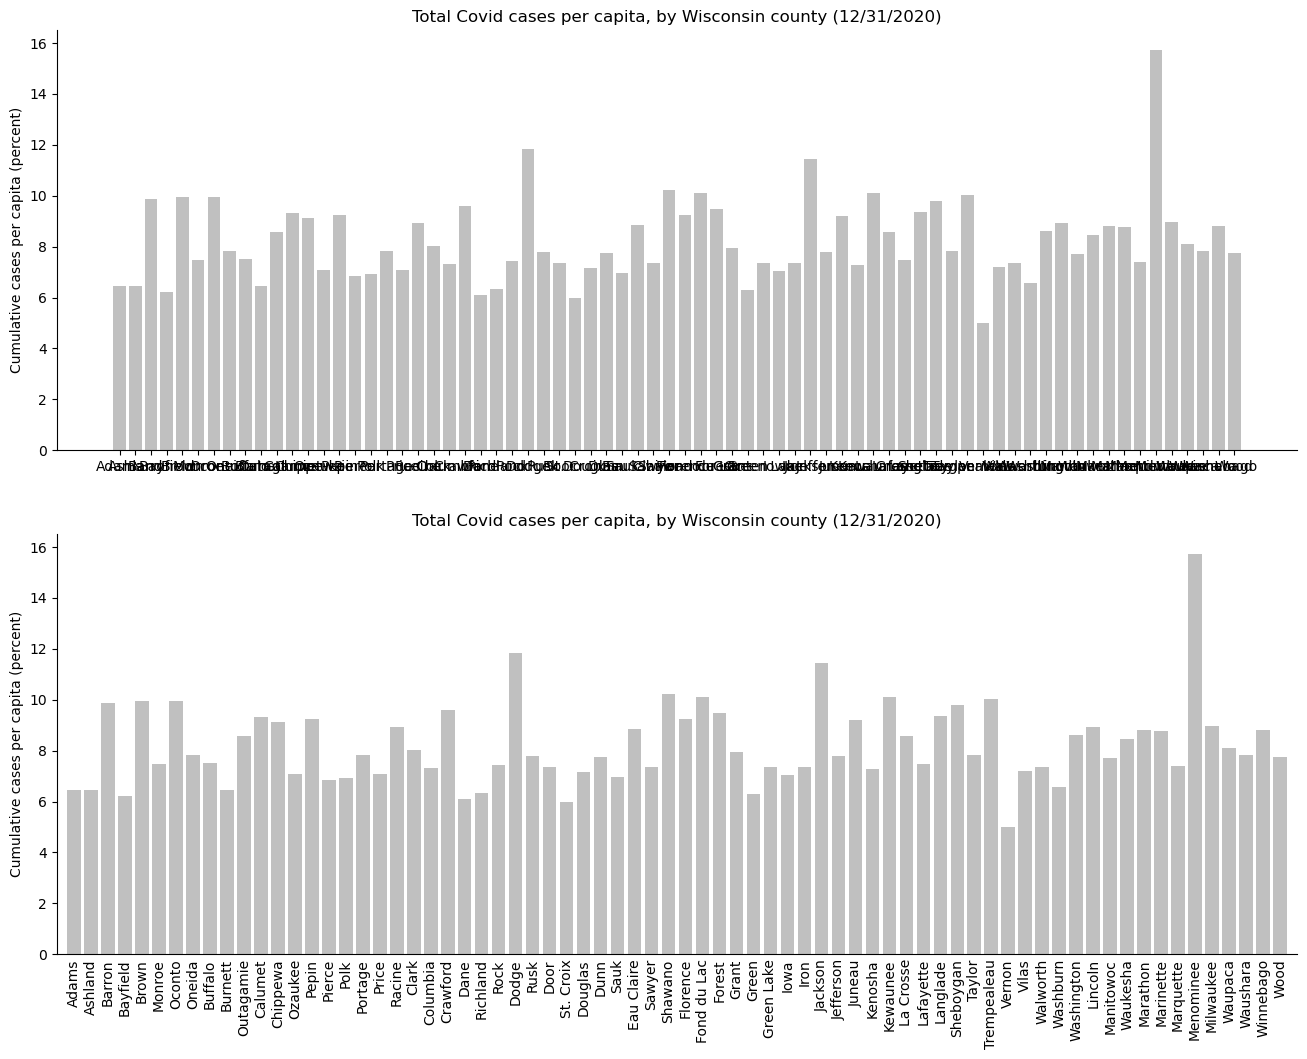

In [14]:
fig, ax = plt.subplots(2,1, figsize=(16,12))

for a in ax:
    a.bar(map_data['NAME'], map_data['PCT_INF'], color='silver')
    sns.despine(ax=a)
    a.set_ylabel('Cumulative cases per capita (percent)')
    a.set_title('Total Covid cases per capita, by Wisconsin county (12/31/2020)')
    
# How to find the x limits
#print(ax[0].get_xlim())

ax[1].set_xlim(-1, 72)
ax[1].tick_params(axis='x', labelrotation=90, length=0)

## Summary 

Wow, that was a lot of things to keep straight! Let's summarize the big points. 

1. Know your message, your audience, and your medium. 
2. Choose the figure type that best conveys your message. 
3. Don't clutter your figure. Make sure every mark in your figure conveys information. 
4. Use color to convey your message, not to make your figure "look nice."
5. Use labels and text thoughtfully 
</mark>

## More practice

Use markdown cells to write out your answers to the practice problems. 

### 1. Rotating tick labels

Some researchers abide by this rule: "The x-axis tick labels should never be rotated." The thinking is that if you need to rotate your labels, you are either using too many labels or the wrong type of chart. This rule definitely has merit. 

Our bar chart on Covid breaks this rule. We do not want to delete some of the labels, so we should think about altering the graph type. What type of chart should you use? How does it fix the problem?

*Try it at home:* Copy the above code for the bar graph into a new cell and modify it to create a figure that obeys the "no rotation" rule.   

### 2. Know your message.
Let's keep working on our bar chart about Covid rates. We want our message to be "these counties had high infection rates and these had low infection rates."

How would you modify the plot to make the message clearer?

*Try it at home:* Modify your code to implement this change. 

### 3. Match the message to the plot type

The map in section **5. Maps** and the bar chart above both represent the same data: The Covid infection rate in WI counties. The difference is the message each plot represents. 

1. Why is a bar chart not a good idea when the message is: There are Covid infection clusters around Menominee, Jackson, and Dodge counties?


2. Why is a map not a good idea when the message is: Menominee, Dodge, Jackson, and Shawano are the four counties with the highest infection rates and Vernon, St. Croix, Dane, and Bayfield are the four counties with the lowest infection rates?

(-3.9899999999999998, 74.99)


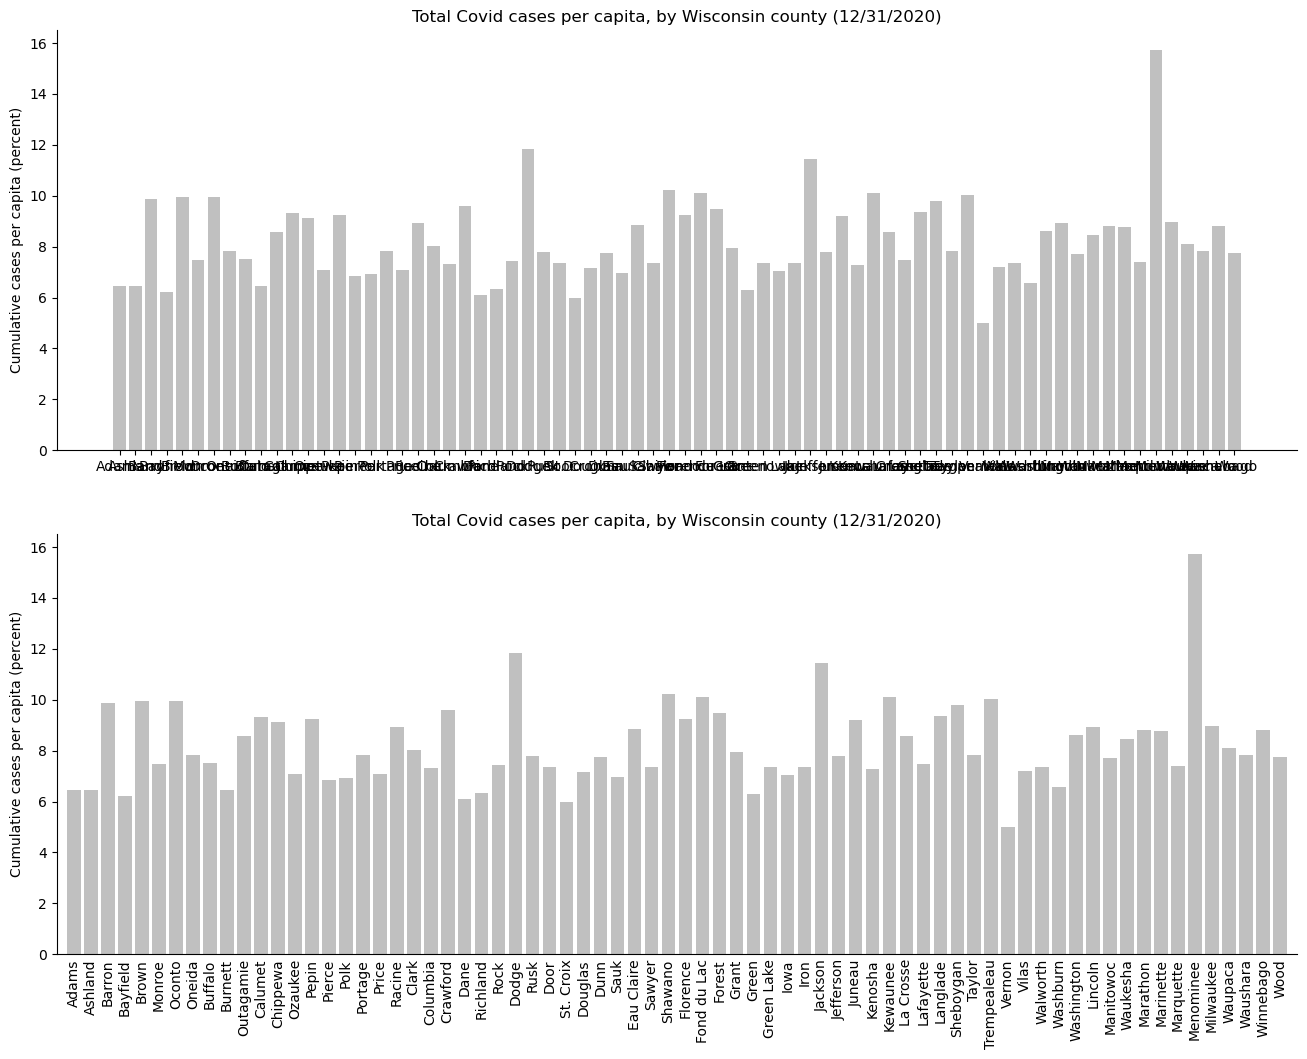

In [21]:
fig, ax = plt.subplots(2,1, figsize=(16,12))

for a in ax:
    a.bar(map_data['NAME'], map_data['PCT_INF'], color='silver')
    sns.despine(ax=a)
    a.set_ylabel('Cumulative cases per capita (percent)')
    a.set_title('Total Covid cases per capita, by Wisconsin county (12/31/2020)')
    
# How to find the x limits
print(ax[0].get_xlim())

ax[1].set_xlim(-1, 72)
ax[1].tick_params(axis='x', labelrotation=90, length=0)